In [1]:
import sys
sys.path.append(".")
import os

import torch
import torch.nn as nn
from torch import optim

from dataset_imae import DataBuilder
from torch.utils.data import DataLoader
from model_imae import VisionTransformer

In [2]:
import copy

from matplotlib import pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VisionTransformer(3, 16, 128, device)

checkpoint_path = "/home/uceckz0/Project/imae/data/Vit_checkpoint_1//epoch_{epoch}.pth".format(epoch=199)
checkpoint = torch.load(checkpoint_path, map_location="cpu")  
model.load_state_dict(checkpoint["model"])

loss_fn = nn.MSELoss()

test_loss = []

In [4]:
rollout_times = 2

dataset = DataBuilder("data/inner_test_file.csv", 10, rollout_times)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

In [9]:
def eval(model, dataloader, mask_ratio):

    model.eval()

    with torch.no_grad():

    # Iterating over the training dataset
        for i, sample in enumerate(dataloader): 

            origin = sample["Input"].float().to(device)
            target = sample["Target"].float().to(device)
 
            target_chunks = torch.chunk(target, rollout_times, dim=1)

            chunk_loss = []
            
            if i == 0: 

                _, ax = plt.subplots(rollout_times*2+1, 10, figsize=(20, rollout_times*4+2))

                for j in range(len(origin[i])): 
                    ax[0][j].imshow(origin[i][j][0].cpu().detach().numpy())
                    ax[0][j].set_xticks([])
                    ax[0][j].set_yticks([])
                    ax[0][j].set_title("Timestep {timestep} (Input)".format(timestep=j+1), fontsize=10)

                    # all_seq = torch.cat((origin, output), dim=1)
                    

                    for k, chunk in enumerate(target_chunks):

                        output = model(origin, mask_ratio)

                        ax[2*k+1][j].imshow(output[i][j][0].cpu().detach().numpy())
                        ax[2*k+1][j].set_xticks([])
                        ax[k+1][j].set_yticks([])
                        ax[k+1][j].set_title("Timestep {timestep} (Prediction)".format(timestep=j+11+k*20), fontsize=10)

                        ax[2*k+2][j].imshow(target[i][j][0].cpu().detach().numpy())
                        ax[2*k+2][j].set_xticks([])
                        ax[2*k+2][j].set_yticks([])
                        ax[2*k+2][j].set_title("Timestep {timestep} (Target)".format(timestep=j+11+k*20), fontsize=10)


                        loss = loss_fn(output, chunk)
                        output = origin
                        num_samples = len(dataloader.dataset)
                        avg_loss = loss / num_samples
                        chunk_loss.append(avg_loss.item())
                        print("Loss: ", k, chunk_loss)
                
                plt.tight_layout()
                plt.show()
                plt.close()

            else: 
                for k, chunk in enumerate(target_chunks):
                    output = model(origin, mask_ratio)
                    loss = loss_fn(output, chunk)
                    output = origin
                    num_samples = len(dataloader.dataset)
                    avg_loss = loss / num_samples
                    chunk_loss.append(avg_loss.item())
                    print("Loss: ", k, chunk_loss)
                break
            break

    # return chunk_loss

            # Calculating loss
            # loss = loss_fn(output, target)

Loss:  [3.6729131807078375e-06]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06, 8.324170266860165e-06]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06, 8.324170266860165e-06, 9.159217370324768e-06]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06, 8.324170266860165e-06, 9.159217370324768e-06, 9.653683264332358e-06]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06, 8.324170266860165e-06, 9.159217370324768e-06, 9.653683264332358e-06, 1.0460559678904247e-05]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06, 8.324170266860165e-06, 9.159217370324768e-06, 9.653683264332358e-06, 1.0460559678904247e-05, 1.081571008398896e-05]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06, 8.324170266860165e-06, 9.159217370324768e-06, 9.653683264332358e-06, 1.0460559678904247e-05, 1.081571008398896e-05, 1.1333302609273233e-05]
Loss:  [3.6729131807078375e-06, 6.425294486689381e-06, 8.324170266860165e-06, 9.159217370324768e

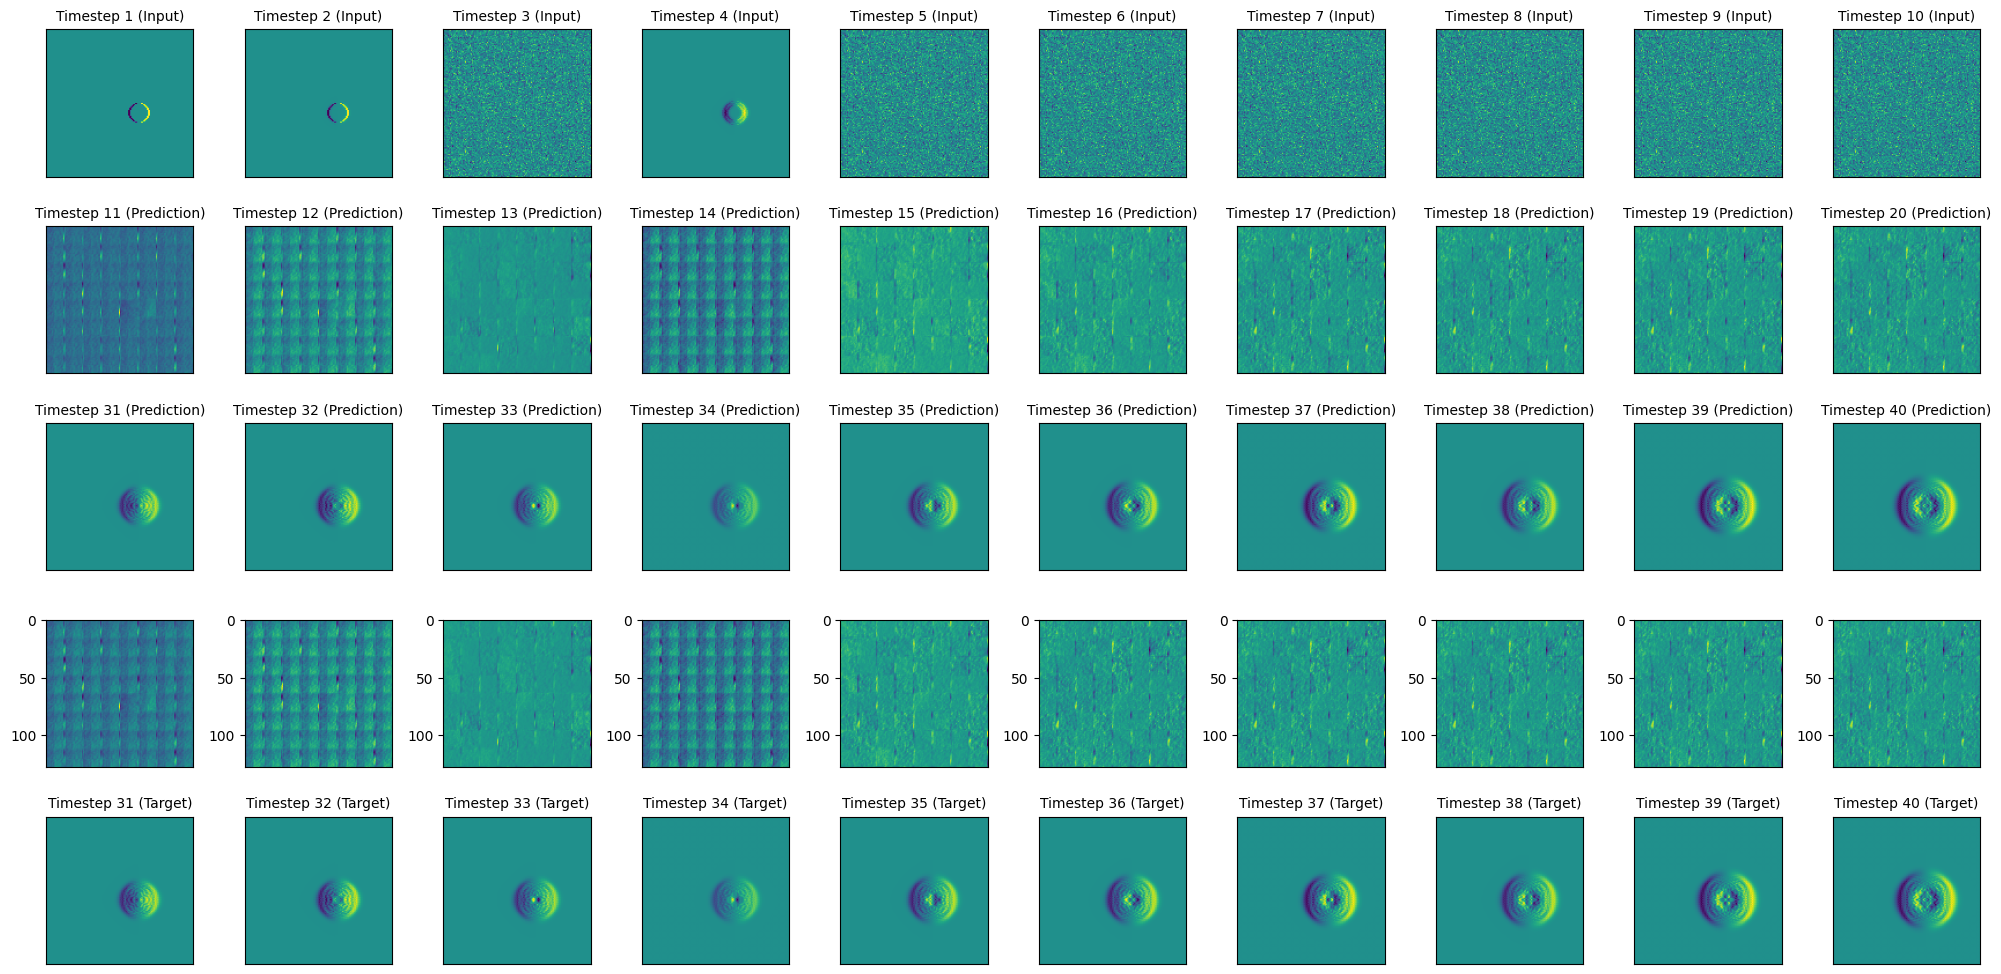

In [10]:
eval(model, dataloader, mask_ratio=0.1)

In [12]:
a = [2,4]
b = [x / 2 for x in a]
b

[1.0, 2.0]

In [14]:
# Defining the lists
a = [1,3]
b = [2,4]

# Adding corresponding elements of the lists
c = [x + y for x, y in zip(a, b)]
c

[3, 7]

In [15]:
running_loss = [1, 3]
loss = [2, 4]

[1, 3, 2, 4]


In [16]:
running_loss = [1, 3]
loss = [2, 4]

# Adding corresponding elements of running_loss and loss
running_loss = [x + y for x, y in zip(running_loss, loss)]

print(running_loss)

[3, 7]
